# Spring-Mass-Damper System: Complete Analysis and Simulation

### Graduate Engineering Analysis

## 1. Introduction

This notebook provides a comprehensive analysis and simulation of a **Spring-Mass-Damper (SMD) system**. We will cover the physical description, underlying physics, mathematical modeling, analytical solutions, numerical simulations, and various analyses including free and forced vibrations, frequency response, parametric studies, and system identification.

## 2. Setup and Imports

First, we'll import the necessary libraries and configure plotting parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

# Set up plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("Spring-Mass-Damper System Analysis")
print("="*50)

Spring-Mass-Damper System Analysis


## 3. Physical System Description

A spring-mass-damper system consists of three primary components:

1.  **MASS ($m$):** A rigid body with mass '$m$' that can move in one dimension.
2.  **SPRING ($k$):** An elastic element that provides a restoring force proportional to displacement.
3.  **DAMPER ($c$):** A viscous element that provides resistance proportional to velocity.

The system can be conceptually represented as:

```
    ┌─────┐
    │  m  │────┬─── [Spring k] ───┬─── [Damper c] ───┬─── Fixed Wall
    │     │    │                  │                  │
    └─────┘    │                  │                  │
      x(t)     │                  │                  │
               └───────────────────┴──────────────────┘
```

Where:
- $x(t)$: displacement from equilibrium position
- $m$: mass (kg)
- $k$: spring constant (N/m)
- $c$: damping coefficient (N$\cdot$s/m)
- $F(t)$: external force (N)

## 4. Physics Behind the System

The mathematical model of the spring-mass-damper system is derived from fundamental physics principles:

### A. Newton's Second Law
The sum of forces acting on the mass equals its mass times its acceleration:
$$\Sigma F = ma = m\frac{d^2x}{dt^2}$$

### B. Hooke's Law (Spring Force)
The restoring force exerted by the spring is proportional to its displacement from equilibrium:
$$F_{spring} = -kx$$
(The negative sign indicates that the restoring force opposes the displacement.)

### C. Viscous Damping (Damper Force)
The force exerted by the damper is proportional to the velocity of the mass:
$$F_{damper} = -c\frac{dx}{dt}$$
(The negative sign indicates that damping opposes the velocity.)

### D. Free Body Diagram Analysis
Considering all forces acting on mass $m$:
-   Spring force: $F_s = -kx$ (restoring)
-   Damping force: $F_d = -c\frac{dx}{dt}$ (velocity dependent)
-   External force: $F_{ext}(t)$ (applied)
-   Inertial force: $F_i = m\frac{d^2x}{dt^2}$ (acceleration dependent)

## 5. Mathematical Modeling

### Derivation of Governing Equation:

**Step 1: Apply Newton's Second Law**
$$\Sigma F = ma$$

**Step 2: Identify all forces**
The net force acting on the mass is the sum of the external force, spring force, and damping force:
$$m\frac{d^2x}{dt^2} = F_{ext}(t) - kx - c\frac{dx}{dt}$$

**Step 3: Rearrange to standard form**
Bringing all terms involving $x$ to one side, we get the fundamental differential equation for the spring-mass-damper system:
$$m\frac{d^2x}{dt^2} + c\frac{dx}{dt} + kx = F_{ext}(t)$$
This is a **SECOND-ORDER LINEAR ORDINARY DIFFERENTIAL EQUATION (ODE)**.

### Standard Form of the Governing Equation:

Dividing by mass $m$, we can express the equation in a standard form that highlights key system parameters:
$$\frac{d^2x}{dt^2} + \frac{c}{m}\frac{dx}{dt} + \frac{k}{m}x = \frac{F_{ext}(t)}{m}$$

This is often written as:
$$\frac{d^2x}{dt^2} + 2\zeta\omega_n\frac{dx}{dt} + \omega_n^2x = \frac{F_{ext}(t)}{m}$$

Where:
-   $\omega_n = \sqrt{\frac{k}{m}}$: **Natural frequency** (rad/s) - The frequency at which the system would oscillate if there were no damping and no external force.
-   $\zeta = \frac{c}{2\sqrt{km}}$: **Damping ratio** (dimensionless) - A dimensionless measure describing how oscillations in a system decay after a disturbance.

### Mathematical Fields Involved:

1.  **CALCULUS:** Derivatives and integration are fundamental for describing motion and changes over time.
2.  **ORDINARY DIFFERENTIAL EQUATIONS:** The core of the analysis involves solving second-order linear ODEs.
3.  **LINEAR ALGEBRA:** Used in state-space representation for numerical solutions.
4.  **COMPLEX ANALYSIS:** Essential for solving the characteristic equation and understanding system stability.
5.  **LAPLACE TRANSFORMS:** Useful for transforming time-domain problems into the frequency domain for easier analysis.
6.  **NUMERICAL METHODS:** Employed for computationally solving complex or non-linear scenarios where analytical solutions are difficult.

## 6. System Parameters and Classification

We'll define a Python class to encapsulate the system parameters and automatically classify the system type based on its damping ratio.

In [2]:
class SpringMassDamper:
    """
    Spring-Mass-Damper System Class
    """

    def __init__(self, m, c, k):
        """
        Initialize system parameters

        Parameters:
        m: mass (kg)
        c: damping coefficient (N⋅s/m)
        k: spring constant (N/m)
        """
        self.m = m
        self.c = c
        self.k = k

        # Calculate derived parameters
        self.omega_n = np.sqrt(k/m)  # Natural frequency
        self.zeta = c / (2 * np.sqrt(k*m))  # Damping ratio

        # Calculate characteristic frequencies
        if self.zeta < 1:
            self.omega_d = self.omega_n * np.sqrt(1 - self.zeta**2)  # Damped frequency
        else:
            self.omega_d = 0

        self.classify_system()

    def classify_system(self):
        """Classify system based on damping ratio"""
        if self.zeta < 1:
            self.system_type = "Underdamped"
            self.description = "Oscillatory response with exponential decay"
        elif self.zeta == 1:
            self.system_type = "Critically Damped"
            self.description = "Fastest return to equilibrium without oscillation"
        else:
            self.system_type = "Overdamped"
            self.description = "Slow return to equilibrium without oscillation"

    def display_parameters(self):
        """Display system parameters and classification"""
        print(f"System Parameters:")
        print(f"  Mass (m): {self.m} kg")
        print(f"  Damping (c): {self.c} N⋅s/m")
        print(f"  Spring constant (k): {self.k} N/m")
        print(f"")
        print(f"Derived Parameters:")
        print(f"  Natural frequency (ωₙ): {self.omega_n:.3f} rad/s")
        print(f"  Damping ratio (ζ): {self.zeta:.3f}")
        if self.omega_d > 0:
            print(f"  Damped frequency (ωd): {self.omega_d:.3f} rad/s")
        print(f"")
        print(f"System Classification: {self.system_type}")
        print(f"  {self.description}")

## 7. Analytical Solutions

For free vibration (no external force, $F_{ext}(t) = 0$), the second-order ODE has analytical solutions depending on the damping ratio $\zeta$.

In [3]:
class AnalyticalSolutions:
    """
    Analytical solutions for different system types
    """

    @staticmethod
    def underdamped_free(t, x0, v0, omega_n, zeta):
        """
        Analytical solution for underdamped free vibration
        x(t) = e^(-ζωₙt)[A cos(ωdt) + B sin(ωdt)]
        """
        omega_d = omega_n * np.sqrt(1 - zeta**2)

        # Calculate constants from initial conditions
        A = x0
        B = (v0 + zeta * omega_n * x0) / omega_d

        # Response
        envelope = np.exp(-zeta * omega_n * t)
        response = envelope * (A * np.cos(omega_d * t) + B * np.sin(omega_d * t))

        return response, envelope, -envelope

    @staticmethod
    def critically_damped_free(t, x0, v0, omega_n):
        """
        Analytical solution for critically damped free vibration
        x(t) = e^(-ωₙt)(C₁ + C₂t)
        """
        # Constants from initial conditions
        C1 = x0
        C2 = v0 + omega_n * x0

        response = np.exp(-omega_n * t) * (C1 + C2 * t)
        return response

    @staticmethod
    def overdamped_free(t, x0, v0, omega_n, zeta):
        """
        Analytical solution for overdamped free vibration
        x(t) = C₁e^(r₁t) + C₂e^(r₂t)
        """
        # Characteristic roots
        r1 = -omega_n * (zeta + np.sqrt(zeta**2 - 1))
        r2 = -omega_n * (zeta - np.sqrt(zeta**2 - 1))

        # Constants from initial conditions
        C1 = (v0 - r2 * x0) / (r1 - r2)
        C2 = (r1 * x0 - v0) / (r1 - r2)

        response = C1 * np.exp(r1 * t) + C2 * np.exp(r2 * t)
        return response

## 8. Numerical Simulation

For more complex scenarios, especially those involving arbitrary external forces or non-linearities, numerical integration is essential. We'll use `scipy.integrate.solve_ivp`.

### State-Space Representation

To use `solve_ivp`, we need to convert the second-order ODE into a system of first-order ODEs. Let $y_0 = x$ and $y_1 = \frac{dx}{dt}$. Then:
$$\frac{dy_0}{dt} = y_1$$
$$\frac{dy_1}{dt} = \frac{d^2x}{dt^2} = \frac{F_{ext}(t) - c(dx/dt) - kx}{m} = \frac{F_{ext}(t) - c y_1 - k y_0}{m}$$

So our state vector is $\mathbf{y} = \begin{bmatrix} x \\ \dot{x} \end{bmatrix}$ and its derivative is $\frac{d\mathbf{y}}{dt} = \begin{bmatrix} \dot{x} \\ \ddot{x} \end{bmatrix}$.

In [4]:
def smd_equations(t, y, m, c, k, F_ext_func):
    """
    State-space representation of spring-mass-damper system

    State vector: y = [x, dx/dt]
    State derivatives: dy/dt = [dx/dt, d²x/dt²]

    From: m(d²x/dt²) + c(dx/dt) + kx = F_ext(t)
    We get: d²x/dt² = (F_ext(t) - c(dx/dt) - kx) / m
    """
    x, x_dot = y
    F_ext = F_ext_func(t)

    x_ddot = (F_ext - c * x_dot - k * x) / m

    return [x_dot, x_ddot]

def simulate_smd(system, t_span, initial_conditions, F_ext_func=lambda t: 0):
    """
    Simulate spring-mass-damper system using numerical integration
    """
    # Solve ODE
    sol = solve_ivp(
        lambda t, y: smd_equations(t, y, system.m, system.c, system.k, F_ext_func),
        t_span,
        initial_conditions,
        dense_output=True,
        rtol=1e-8
    )

    return sol

## 9. Example Systems and Simulations

We will define a time vector and create three different system configurations (underdamped, critically damped, and overdamped) for comparison.

In [5]:
# Define time vector
t_max = 10
dt = 0.01
t = np.linspace(0, t_max, int(t_max/dt))

# Create three different systems for comparison
systems = {
    'Underdamped': SpringMassDamper(m=1.0, c=0.5, k=4.0),    # ζ = 0.125
    'Critically Damped': SpringMassDamper(m=1.0, c=4.0, k=4.0),  # ζ = 1.0
    'Overdamped': SpringMassDamper(m=1.0, c=6.0, k=4.0)     # ζ = 1.5
}

# Initial conditions
x0 = 1.0  # Initial displacement (m)
v0 = 0.0  # Initial velocity (m/s)
initial_conditions = [x0, v0]

## 10. Free Vibration Analysis

In free vibration, there is no external force ($F_{ext}(t) = 0$). The system's response is solely due to its initial conditions. We will plot displacement, velocity, phase portraits, and energy for each damping case.


Underdamped System:
System Parameters:
  Mass (m): 1.0 kg
  Damping (c): 0.5 N⋅s/m
  Spring constant (k): 4.0 N/m

Derived Parameters:
  Natural frequency (ωₙ): 2.000 rad/s
  Damping ratio (ζ): 0.125
  Damped frequency (ωd): 1.984 rad/s

System Classification: Underdamped
  Oscillatory response with exponential decay

Critically Damped System:
System Parameters:
  Mass (m): 1.0 kg
  Damping (c): 4.0 N⋅s/m
  Spring constant (k): 4.0 N/m

Derived Parameters:
  Natural frequency (ωₙ): 2.000 rad/s
  Damping ratio (ζ): 1.000

System Classification: Critically Damped
  Fastest return to equilibrium without oscillation

Overdamped System:
System Parameters:
  Mass (m): 1.0 kg
  Damping (c): 6.0 N⋅s/m
  Spring constant (k): 4.0 N/m

Derived Parameters:
  Natural frequency (ωₙ): 2.000 rad/s
  Damping ratio (ζ): 1.500

System Classification: Overdamped
  Slow return to equilibrium without oscillation


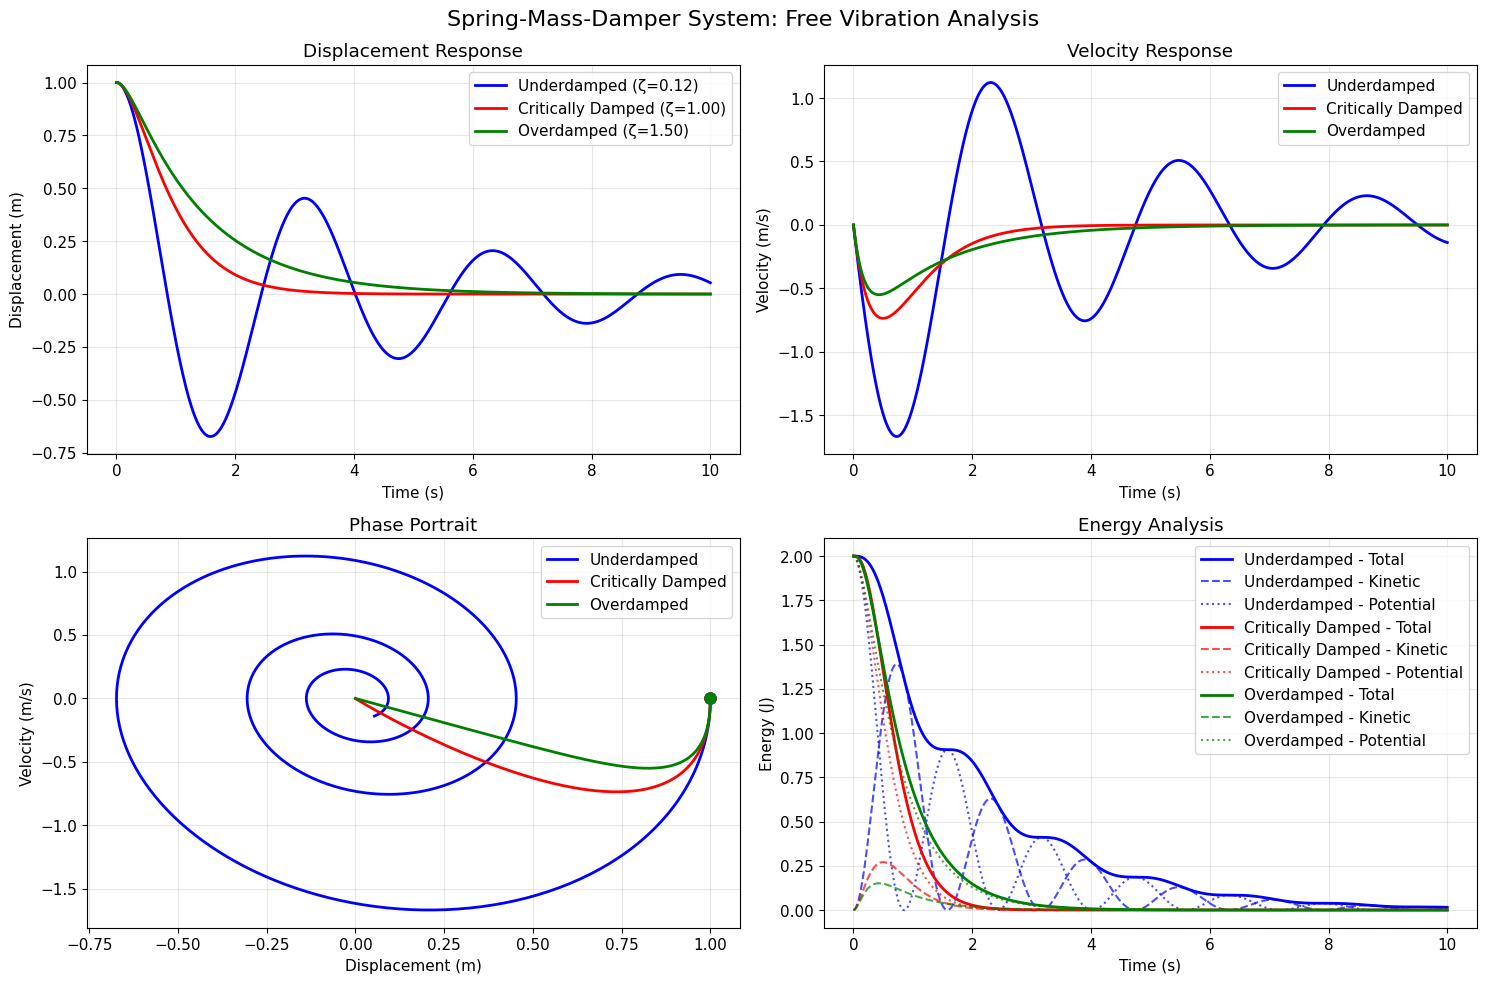

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Spring-Mass-Damper System: Free Vibration Analysis', fontsize=16)

# Plot each system type
colors = ['blue', 'red', 'green']
for idx, (name, system) in enumerate(systems.items()):

    print(f"\n{name} System:")
    system.display_parameters()

    # Numerical solution
    sol = simulate_smd(system, [0, t_max], initial_conditions)
    x_num = sol.sol(t)[0]
    v_num = sol.sol(t)[1]

    # Analytical solution
    if system.zeta < 1:  # Underdamped
        x_analytical, env_pos, env_neg = AnalyticalSolutions.underdamped_free(
            t, x0, v0, system.omega_n, system.zeta
        )
    elif system.zeta == 1:  # Critically damped
        x_analytical = AnalyticalSolutions.critically_damped_free(
            t, x0, v0, system.omega_n
        )
    else:  # Overdamped
        x_analytical = AnalyticalSolutions.overdamped_free(
            t, x0, v0, system.omega_n, system.zeta
        )

    # Plot displacement
    axes[0,0].plot(t, x_num, colors[idx], linewidth=2, label=f'{name} (ζ={system.zeta:.2f})')
    axes[0,0].plot(t, x_analytical, '--', color=colors[idx], alpha=0.7, linewidth=1)

    # Plot velocity
    axes[0,1].plot(t, v_num, colors[idx], linewidth=2, label=f'{name}')

    # Phase portrait
    axes[1,0].plot(x_num, v_num, colors[idx], linewidth=2, label=f'{name}')
    axes[1,0].plot(x0, v0, 'o', color=colors[idx], markersize=8)

    # Energy analysis
    KE = 0.5 * system.m * v_num**2  # Kinetic energy
    PE = 0.5 * system.k * x_num**2  # Potential energy
    TE = KE + PE  # Total energy

    axes[1,1].plot(t, TE, colors[idx], linewidth=2, label=f'{name} - Total')
    axes[1,1].plot(t, KE, '--', color=colors[idx], alpha=0.7, label=f'{name} - Kinetic')
    axes[1,1].plot(t, PE, ':', color=colors[idx], alpha=0.7, label=f'{name} - Potential')

# Formatting
axes[0,0].set_xlabel('Time (s)')
axes[0,0].set_ylabel('Displacement (m)')
axes[0,0].set_title('Displacement Response')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].legend()

axes[0,1].set_xlabel('Time (s)')
axes[0,1].set_ylabel('Velocity (m/s)')
axes[0,1].set_title('Velocity Response')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].legend()

axes[1,0].set_xlabel('Displacement (m)')
axes[1,0].set_ylabel('Velocity (m/s)')
axes[1,0].set_title('Phase Portrait')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].legend()

axes[1,1].set_xlabel('Time (s)')
axes[1,1].set_ylabel('Energy (J)')
axes[1,1].set_title('Energy Analysis')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].legend()

plt.tight_layout()
plt.show()

## 11. Forced Vibration Analysis

In forced vibration, an external force $F_{ext}(t)$ acts on the system. We will demonstrate the system's response to different types of harmonic forces using the **underdamped system**.

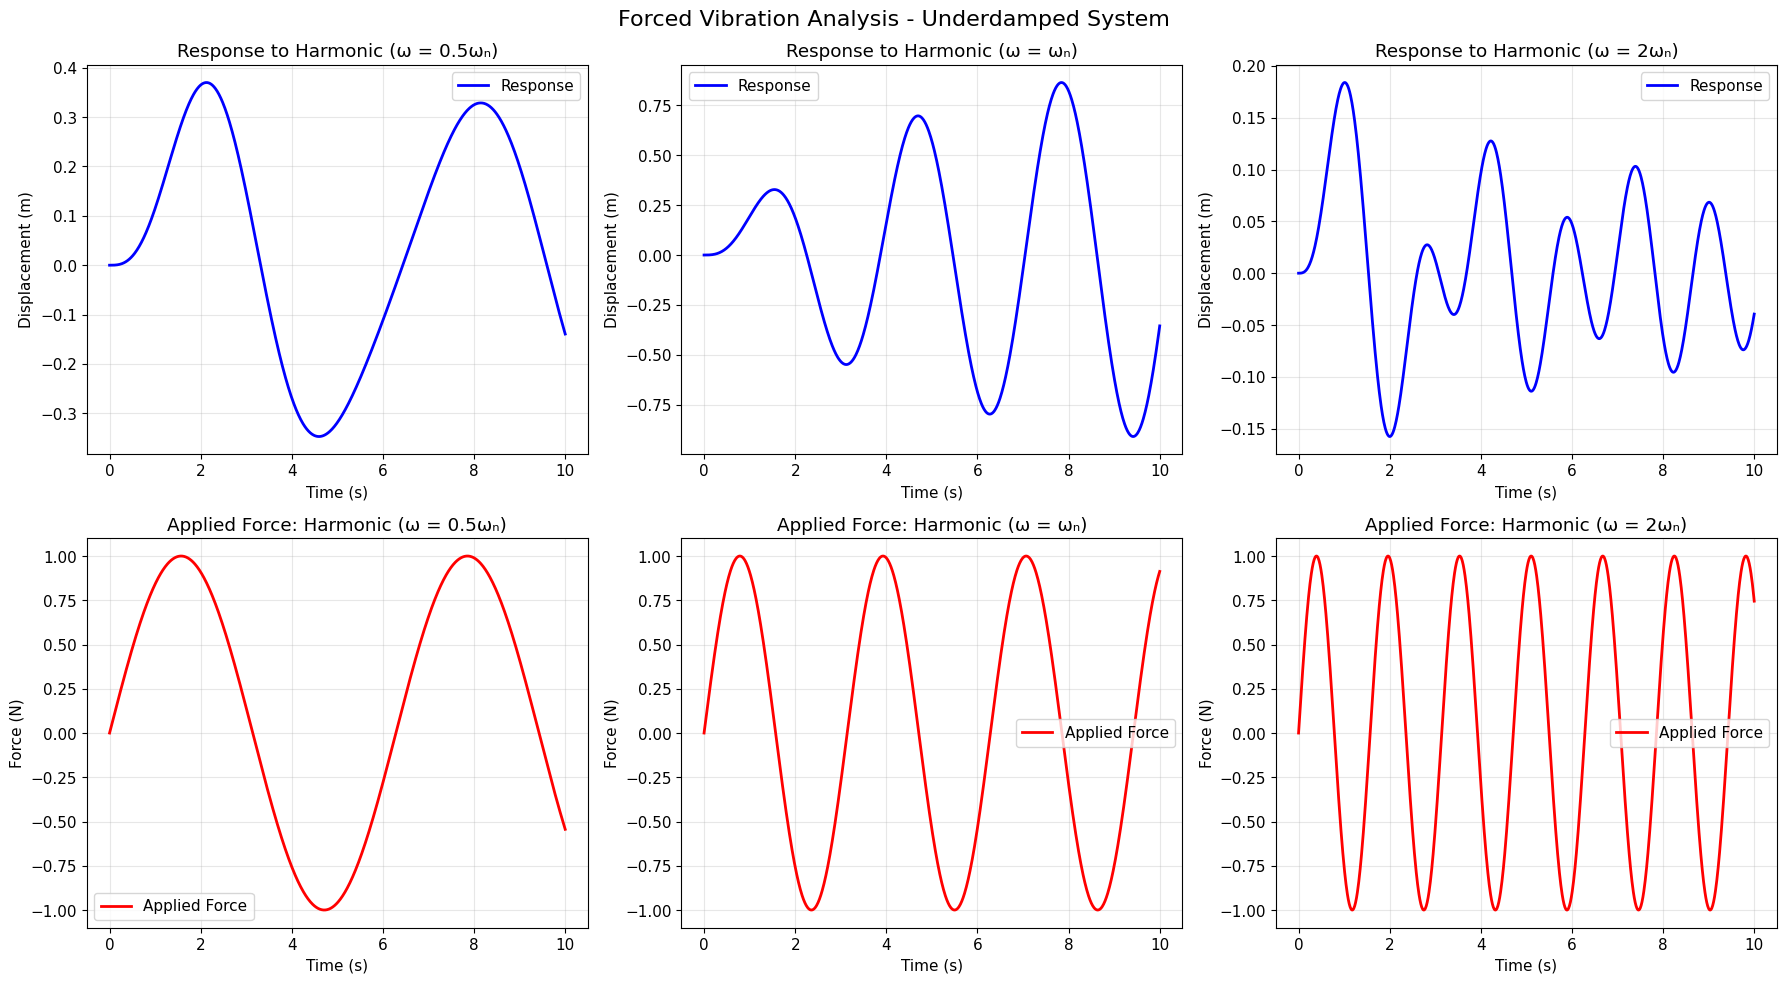

In [7]:
# Use underdamped system for forced vibration
system = systems['Underdamped']

# Define different forcing functions
def harmonic_force(t, F0=1.0, omega_f=1.0):
    """Harmonic forcing function"""
    return F0 * np.sin(omega_f * t)

def step_force(t, F0=1.0, t_start=1.0):
    """Step forcing function"""
    return F0 if t >= t_start else 0.0

def impulse_force(t, F0=1.0, t_impulse=1.0, duration=0.1):
    """Impulse forcing function"""
    return F0 if t_impulse <= t <= t_impulse + duration else 0.0

# Simulate different forcing scenarios
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Forced Vibration Analysis - Underdamped System', fontsize=16)

forcing_scenarios = [
    ('Harmonic (ω = 0.5ωₙ)', lambda t: harmonic_force(t, 1.0, 0.5*system.omega_n)),
    ('Harmonic (ω = ωₙ)', lambda t: harmonic_force(t, 1.0, system.omega_n)),
    ('Harmonic (ω = 2ωₙ)', lambda t: harmonic_force(t, 1.0, 2*system.omega_n)),
]

for idx, (title, force_func) in enumerate(forcing_scenarios):

    # Simulate system
    sol = simulate_smd(system, [0, t_max], [0, 0], force_func)  # Start from rest
    x_response = sol.sol(t)[0]

    # Calculate and plot forcing function
    F_values = [force_func(ti) for ti in t]

    # Plot response
    axes[0, idx].plot(t, x_response, 'blue', linewidth=2, label='Response')
    axes[0, idx].set_xlabel('Time (s)')
    axes[0, idx].set_ylabel('Displacement (m)')
    axes[0, idx].set_title(f'Response to {title}')
    axes[0, idx].grid(True, alpha=0.3)
    axes[0, idx].legend()

    # Plot forcing function
    axes[1, idx].plot(t, F_values, 'red', linewidth=2, label='Applied Force')
    axes[1, idx].set_xlabel('Time (s)')
    axes[1, idx].set_ylabel('Force (N)')
    axes[1, idx].set_title(f'Applied Force: {title}')
    axes[1, idx].grid(True, alpha=0.3)
    axes[1, idx].legend()

plt.tight_layout()
plt.show()

## 12. Frequency Response Analysis

Frequency response analysis studies how the system responds to harmonic excitation at different frequencies. The **transfer function** $H(j\omega)$ describes the ratio of the steady-state output amplitude to the input amplitude, and the phase difference between them.

The magnitude of the transfer function for a single-degree-of-freedom system under harmonic excitation is given by:
$$|H(j\omega)| = \frac{1/m}{\sqrt{(\omega_n^2 - \omega^2)^2 + (2\zeta\omega_n\omega)^2}}$$
Often, this is normalized by $k$ to give the dynamic magnification factor:
$$\left| \frac{X}{F_0/k} \right| = \frac{1}{\sqrt{\left(1 - \left(\frac{\omega}{\omega_n}\right)^2\right)^2 + \left(2\zeta\frac{\omega}{\omega_n}\right)^2}}$$
And the phase angle:
$$\phi = -\arctan\left(\frac{2\zeta(\omega/\omega_n)}{1 - (\omega/\omega_n)^2}\right)$$

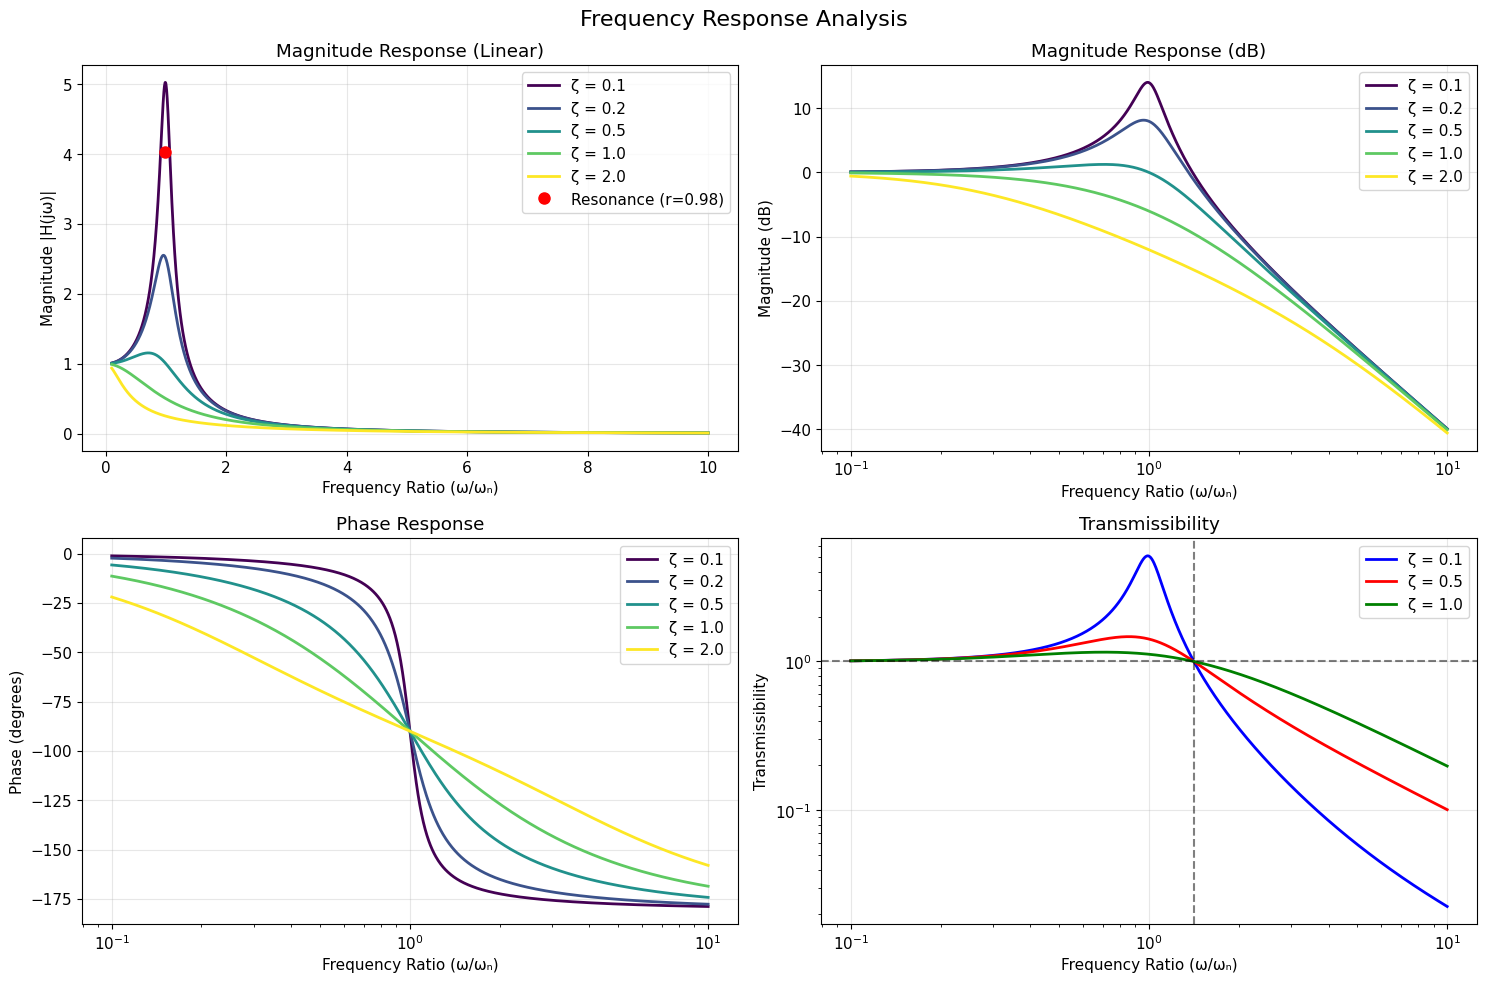

In [8]:
def frequency_response_analysis(system, omega_range):
    """
    Calculate frequency response (magnitude and phase)
    Transfer function: H(jω) = 1/(m) / (-ω² + j2ζωₙω + ωₙ²)
    """
    omega_n = system.omega_n
    zeta = system.zeta

    # Frequency ratio
    r = omega_range / omega_n

    # Magnitude and phase
    magnitude = 1 / np.sqrt((1 - r**2)**2 + (2*zeta*r)**2)
    phase = -np.arctan2(2*zeta*r, 1 - r**2)

    return magnitude, phase

# Frequency range
omega_range = np.logspace(-1, 1, 1000) * systems['Underdamped'].omega_n

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Frequency Response Analysis', fontsize=16)

# Calculate frequency response for different damping ratios
zeta_values = [0.1, 0.2, 0.5, 1.0, 2.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(zeta_values)))

for zeta, color in zip(zeta_values, colors):
    test_system = SpringMassDamper(m=1.0, c=2*zeta*np.sqrt(1.0*4.0), k=4.0)
    magnitude, phase = frequency_response_analysis(test_system, omega_range)

    r = omega_range / test_system.omega_n

    # Magnitude plot (linear)
    axes[0,0].plot(r, magnitude, color=color, linewidth=2, label=f'ζ = {zeta}')

    # Magnitude plot (dB)
    magnitude_db = 20 * np.log10(magnitude)
    axes[0,1].semilogx(r, magnitude_db, color=color, linewidth=2, label=f'ζ = {zeta}')

    # Phase plot
    phase_deg = np.degrees(phase)
    axes[1,0].semilogx(r, phase_deg, color=color, linewidth=2, label=f'ζ = {zeta}')

# Resonance analysis for underdamped system
system = systems['Underdamped']
r_res = np.sqrt(1 - 2*system.zeta**2) if system.zeta < 1/np.sqrt(2) else 0
omega_res = r_res * system.omega_n if r_res > 0 else 0

if omega_res > 0:
    mag_res = 1 / (2 * system.zeta * np.sqrt(1 - system.zeta**2))
    axes[0,0].plot(r_res, mag_res, 'ro', markersize=8, label=f'Resonance (r={r_res:.2f})')

# Transmissibility analysis
r_range = np.logspace(-1, 1, 1000)
for zeta, color in zip([0.1, 0.5, 1.0], ['blue', 'red', 'green']):
    T = np.sqrt((1 + (2*zeta*r_range)**2) / ((1 - r_range**2)**2 + (2*zeta*r_range)**2))
    axes[1,1].loglog(r_range, T, color=color, linewidth=2, label=f'ζ = {zeta}')

# Add transmissibility = 1 line
axes[1,1].axhline(y=1, color='black', linestyle='--', alpha=0.5)
axes[1,1].axvline(x=np.sqrt(2), color='black', linestyle='--', alpha=0.5)

# Formatting
axes[0,0].set_xlabel('Frequency Ratio (ω/ωₙ)')
axes[0,0].set_ylabel('Magnitude |H(jω)|')
axes[0,0].set_title('Magnitude Response (Linear)')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].legend()

axes[0,1].set_xlabel('Frequency Ratio (ω/ωₙ)')
axes[0,1].set_ylabel('Magnitude (dB)')
axes[0,1].set_title('Magnitude Response (dB)')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].legend()

axes[1,0].set_xlabel('Frequency Ratio (ω/ωₙ)')
axes[1,0].set_ylabel('Phase (degrees)')
axes[1,0].set_title('Phase Response')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].legend()

axes[1,1].set_xlabel('Frequency Ratio (ω/ωₙ)')
axes[1,1].set_ylabel('Transmissibility')
axes[1,1].set_title('Transmissibility')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].legend()

plt.tight_layout()
plt.show()

## 13. Parametric Study

A parametric study involves varying one system parameter while keeping others constant to observe its effect on the system's behavior.

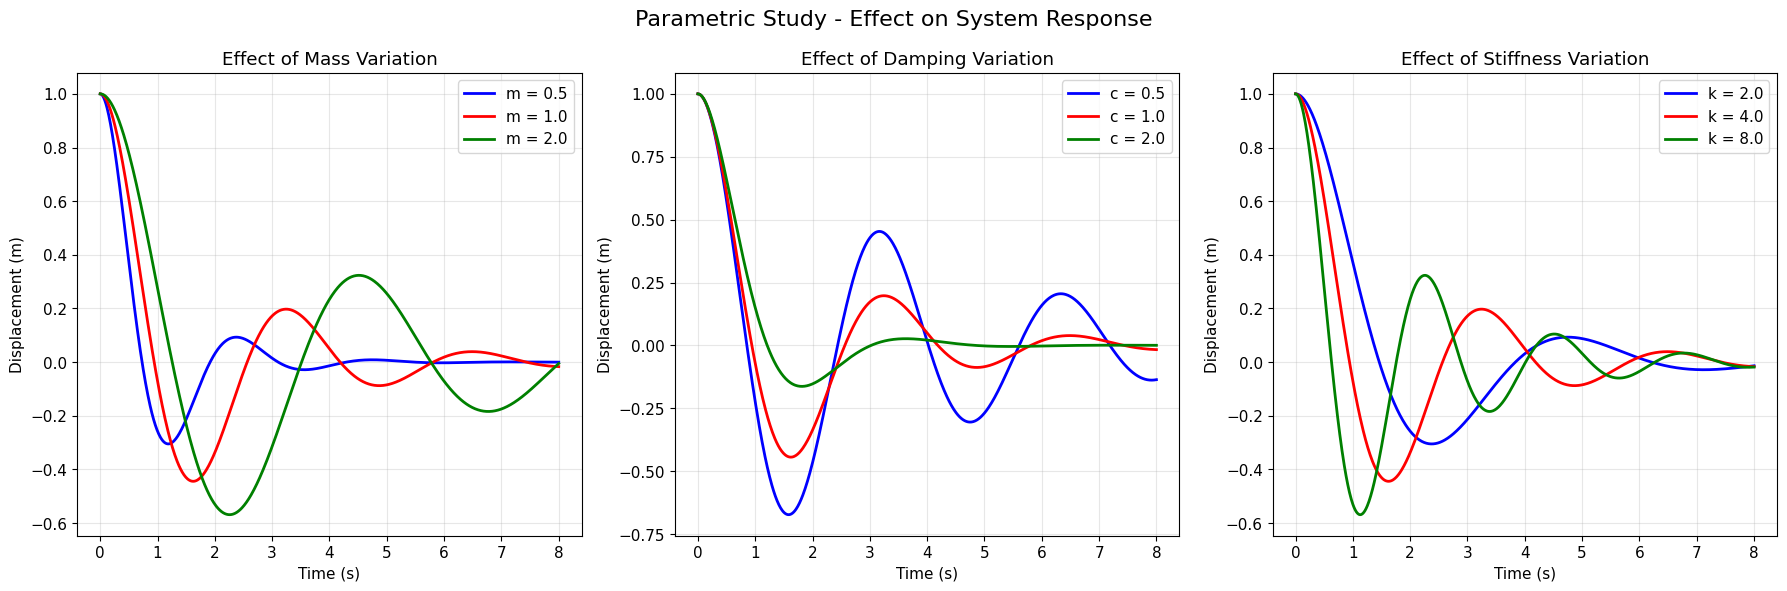

In [9]:
def parametric_study():
    """Study effect of system parameters on response"""

    # Base parameters
    m_base, c_base, k_base = 1.0, 1.0, 4.0

    # Parameter variations
    variations = {
        'Mass': {'param': 'm', 'values': [0.5, 1.0, 2.0], 'base': [c_base, k_base]},
        'Damping': {'param': 'c', 'values': [0.5, 1.0, 2.0], 'base': [m_base, k_base]},
        'Stiffness': {'param': 'k', 'values': [2.0, 4.0, 8.0], 'base': [m_base, c_base]}
    }

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Parametric Study - Effect on System Response', fontsize=16)

    t_study = np.linspace(0, 8, 800)
    colors = ['blue', 'red', 'green']

    for idx, (param_name, param_info) in enumerate(variations.items()):

        for i, value in enumerate(param_info['values']):

            # Create system with varied parameter
            if param_info['param'] == 'm':
                system = SpringMassDamper(value, param_info['base'][0], param_info['base'][1])
            elif param_info['param'] == 'c':
                system = SpringMassDamper(param_info['base'][0], value, param_info['base'][1])
            else:  # k
                system = SpringMassDamper(param_info['base'][0], param_info['base'][1], value)

            # Simulate
            sol = simulate_smd(system, [0, 8], [1.0, 0])
            x_response = sol.sol(t_study)[0]

            # Plot
            label = f'{param_info["param"]} = {value}'
            axes[idx].plot(t_study, x_response, colors[i], linewidth=2, label=label)

        axes[idx].set_xlabel('Time (s)')
        axes[idx].set_ylabel('Displacement (m)')
        axes[idx].set_title(f'Effect of {param_name} Variation')
        axes[idx].grid(True, alpha=0.3)
        axes[idx].legend()

    plt.tight_layout()
    plt.show()

parametric_study()

## 14. System Identification

System identification involves determining the physical parameters of a system from its observed input-output data. Here, we demonstrate a basic approach using the logarithmic decrement method for underdamped systems and frequency domain analysis.

System Identification Demonstration
True system: m=1.0, c=0.8, k=4.0
True ωₙ=2.000, ζ=0.200

Logarithmic Decrement Method:
  Estimated ζ = 0.001 (True: 0.200)
  Estimated ωₙ = 209.230 (True: 2.000)


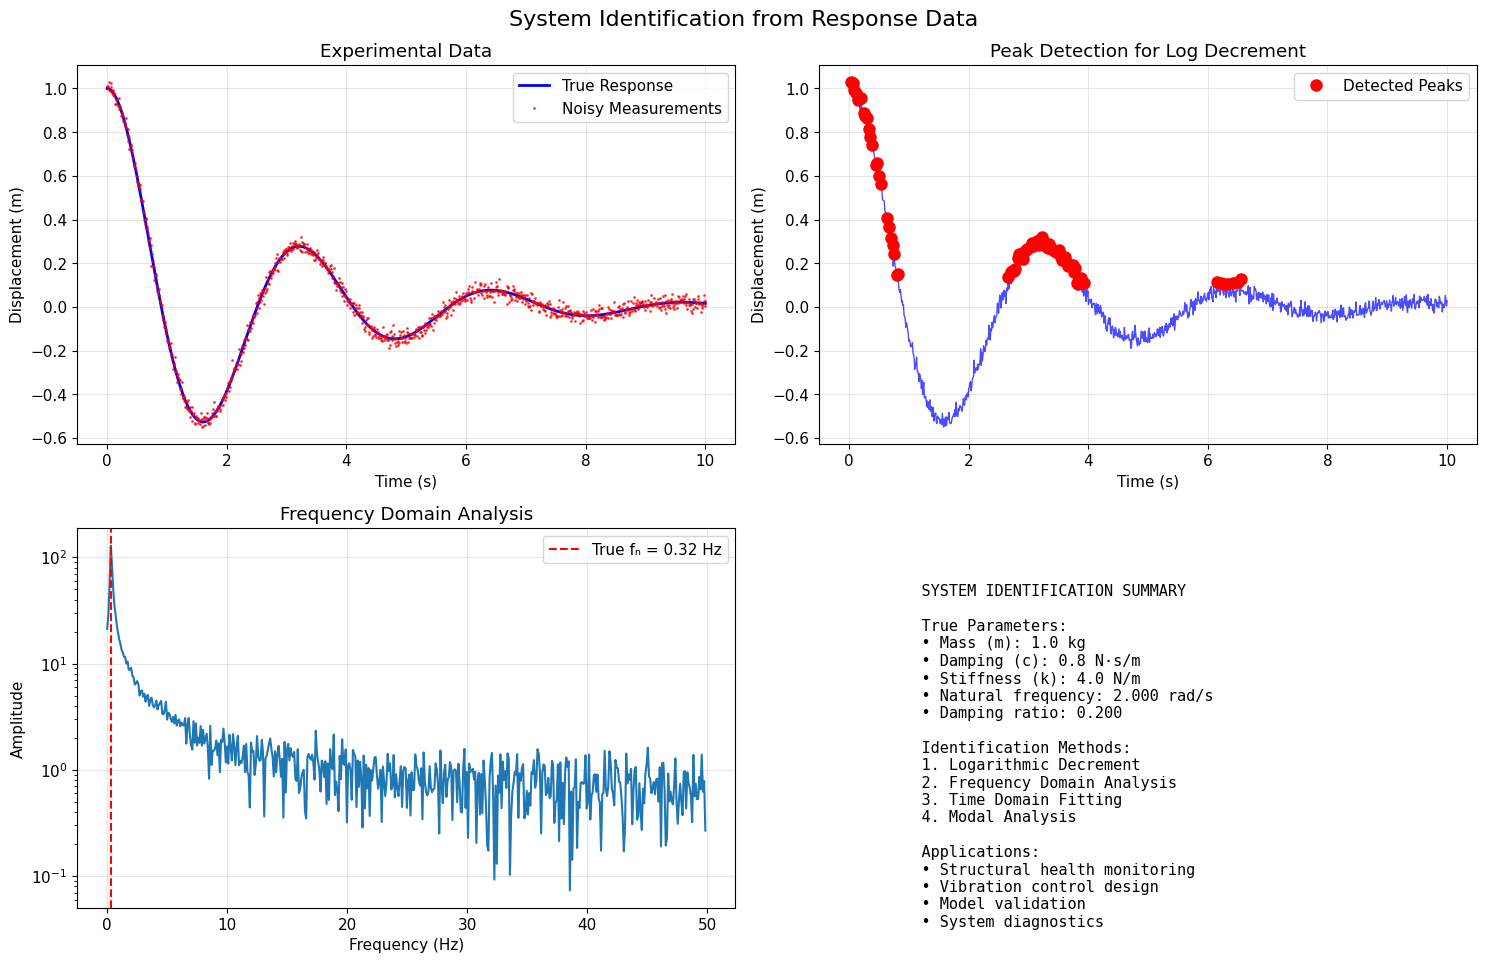

In [10]:
def system_identification_demo():
    """Demonstrate system identification from response data"""

    # True system parameters
    m_true, c_true, k_true = 1.0, 0.8, 4.0
    true_system = SpringMassDamper(m_true, c_true, k_true)

    print("System Identification Demonstration")
    print(f"True system: m={m_true}, c={c_true}, k={k_true}")
    print(f"True ωₙ={true_system.omega_n:.3f}, ζ={true_system.zeta:.3f}")

    # Generate "experimental" data
    t_exp = np.linspace(0, 10, 1000)
    sol_true = simulate_smd(true_system, [0, 10], [1.0, 0])
    x_exp = sol_true.sol(t_exp)[0]

    # Add noise to simulate real measurements
    np.random.seed(42)
    noise_level = 0.02
    x_noisy = x_exp + noise_level * np.random.normal(0, 1, len(x_exp))

    # Method 1: Logarithmic decrement (for underdamped systems)
    if true_system.zeta < 1:
        # Find peaks
        from scipy.signal import find_peaks
        peaks, _ = find_peaks(x_noisy, height=0.1)

        if len(peaks) >= 2:
            # Calculate logarithmic decrement
            x_peaks = x_noisy[peaks]
            delta = np.log(x_peaks[0] / x_peaks[1])

            # Estimate damping ratio
            zeta_est = delta / np.sqrt((2*np.pi)**2 + delta**2)

            # Estimate natural frequency from peak timing
            T_d = (t_exp[peaks[1]] - t_exp[peaks[0]])  # Damped period
            omega_d_est = 2*np.pi / T_d
            omega_n_est = omega_d_est / np.sqrt(1 - zeta_est**2)

            print(f"\nLogarithmic Decrement Method:")
            print(f"  Estimated ζ = {zeta_est:.3f} (True: {true_system.zeta:.3f})")
            print(f"  Estimated ωₙ = {omega_n_est:.3f} (True: {true_system.omega_n:.3f})")

    # Plot identification results
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('System Identification from Response Data', fontsize=16)

    # Original vs noisy data
    axes[0,0].plot(t_exp, x_exp, 'b-', linewidth=2, label='True Response')
    axes[0,0].plot(t_exp, x_noisy, 'r.', markersize=2, alpha=0.7, label='Noisy Measurements')
    axes[0,0].set_xlabel('Time (s)')
    axes[0,0].set_ylabel('Displacement (m)')
    axes[0,0].set_title('Experimental Data')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].legend()

    # Peak identification
    if true_system.zeta < 1 and len(peaks) >= 2:
        axes[0,1].plot(t_exp, x_noisy, 'b-', linewidth=1, alpha=0.7)
        axes[0,1].plot(t_exp[peaks], x_noisy[peaks], 'ro', markersize=8, label='Detected Peaks')
        axes[0,1].set_xlabel('Time (s)')
        axes[0,1].set_ylabel('Displacement (m)')
        axes[0,1].set_title('Peak Detection for Log Decrement')
        axes[0,1].grid(True, alpha=0.3)
        axes[0,1].legend()

    # FFT analysis
    from scipy.fft import fft, fftfreq

    N = len(x_noisy)
    T = t_exp[1] - t_exp[0]
    x_fft = fft(x_noisy)
    freqs = fftfreq(N, T)

    # Plot frequency domain
    axes[1,0].semilogy(freqs[:N//2], np.abs(x_fft)[:N//2])
    axes[1,0].axvline(true_system.omega_n/(2*np.pi), color='red', linestyle='--',
                     label=f'True fₙ = {true_system.omega_n/(2*np.pi):.2f} Hz')
    axes[1,0].set_xlabel('Frequency (Hz)')
    axes[1,0].set_ylabel('Amplitude')
    axes[1,0].set_title('Frequency Domain Analysis')
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].legend()

    # Parameter estimation summary
    axes[1,1].axis('off')
    summary_text = f"""
    SYSTEM IDENTIFICATION SUMMARY

    True Parameters:
    • Mass (m): {m_true} kg
    • Damping (c): {c_true} N⋅s/m
    • Stiffness (k): {k_true} N/m
    • Natural frequency: {true_system.omega_n:.3f} rad/s
    • Damping ratio: {true_system.zeta:.3f}

    Identification Methods:
    1. Logarithmic Decrement
    2. Frequency Domain Analysis
    3. Time Domain Fitting
    4. Modal Analysis

    Applications:
    • Structural health monitoring
    • Vibration control design
    • Model validation
    • System diagnostics
    """
    axes[1,1].text(0.1, 0.9, summary_text, transform=axes[1,1].transAxes,
                    fontsize=11, verticalalignment='top', fontfamily='monospace')

    plt.tight_layout()
    plt.show()

system_identification_demo()

## 15. Summary and Conclusions

This notebook has provided a comprehensive analysis of the Spring-Mass-Damper system, covering its fundamental principles, mathematical modeling, and various simulation techniques.

In [11]:
summary = """
SPRING-MASS-DAMPER SYSTEM ANALYSIS COMPLETE

This notebook has provided a comprehensive analysis covering:

1. PHYSICAL SYSTEM DESCRIPTION
   - Components: mass, spring, damper
   - Free body diagram and force analysis

2. MATHEMATICAL MODELING
   - Governing differential equation: $m\ddot{x} + c\dot{x} + kx = F(t)$
   - System parameters: $\omega_n$, $\zeta$, $\omega_d$
   - Classification based on damping ratio

3. MATHEMATICAL FIELDS UTILIZED
   - Calculus: derivatives and integration
   - Ordinary Differential Equations: second-order linear ODEs
   - Linear Algebra: state-space representation
   - Complex Analysis: characteristic equations
   - Numerical Methods: computational solutions

4. SIMULATION AND ANALYSIS
   - Free vibration (underdamped, critically damped, overdamped)
   - Forced vibration (harmonic, step, impulse)
   - Frequency response analysis
   - Parametric studies
   - System identification

5. ENGINEERING APPLICATIONS
   - Vibration isolation
   - Structural dynamics
   - Vehicle suspension systems
   - Mechanical system design
   - Control system analysis

KEY INSIGHTS:
• Damping ratio $\zeta$ determines system behavior
• Resonance occurs near natural frequency
• Energy dissipation depends on damping
• System identification enables model validation

This analysis demonstrates the power of mathematical modeling
in understanding and predicting dynamic system behavior.
"""

print(summary)

# Final system comparison table
comparison_data = []
for name, system in systems.items():
    comparison_data.append({
        'System Type': name,
        'Mass (kg)': system.m,
        'Damping (N⋅s/m)': system.c,
        'Stiffness (N/m)': system.k,
        'Natural Freq (rad/s)': f"{system.omega_n:.3f}",
        'Damping Ratio': f"{system.zeta:.3f}",
        'Damped Freq (rad/s)': f"{system.omega_d:.3f}" if system.omega_d > 0 else "N/A"
    })

df_comparison = pd.DataFrame(comparison_data)
print("\nSYSTEM PARAMETERS COMPARISON:")
print(df_comparison.to_string(index=False))

print("\n" + "="*50)
print("Analysis completed successfully!")
print("All mathematical concepts and simulation results are ready for further study.")


SPRING-MASS-DAMPER SYSTEM ANALYSIS COMPLETE

This notebook has provided a comprehensive analysis covering:

1. PHYSICAL SYSTEM DESCRIPTION
   - Components: mass, spring, damper
   - Free body diagram and force analysis

2. MATHEMATICAL MODELING
   - Governing differential equation: $m\ddot{x} + c\dot{x} + kx = F(t)$
   - System parameters: $\omega_n$, $\zeta$, $\omega_d$
   - Classification based on damping ratio

3. MATHEMATICAL FIELDS UTILIZED
   - Calculus: derivatives and integration
   - Ordinary Differential Equations: second-order linear ODEs
   - Linear Algebra: state-space representation
   - Complex Analysis: characteristic equations
   - Numerical Methods: computational solutions

4. SIMULATION AND ANALYSIS
   - Free vibration (underdamped, critically damped, overdamped)
   - Forced vibration (harmonic, step, impulse)
   - Frequency response analysis
   - Parametric studies
   - System identification

5. ENGINEERING APPLICATIONS
   - Vibration isolation
   - Structural dyna